##### 逻辑回归中使用多项式特征

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

In [5]:
X = np.random.normal(0,1,size=(200,2)) # 代表均值和标准差
y = np.array(X[:,0]**2 + X[:,1]**2 < 1.5,dtype="int")

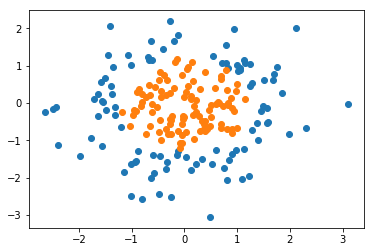

In [6]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [7]:
def plot_deciBiOn_boundary(model,axis):
    x0,x1 = np.meshgrid(
        np.linspace(axis[0],axis[1],int((axis[1] - axis[0])*100)).reshape(-1,1),
        np.linspace(axis[2],axis[3],int((axis[3] - axis[2])*100)).reshape(-1,1),
    )
   
    X_new = np.c_[x0.ravel(),x1.ravel()]
    
    print(type(x0.ravel()))
    print(type(x0))
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(["#EF9A9A","#FFF590","#90CAF9"])
    plt.contourf(x0,x1,zz,cmap=custom_cmap,linewidth=5)

    

In [8]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
knn.score(X,y)

0.99

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


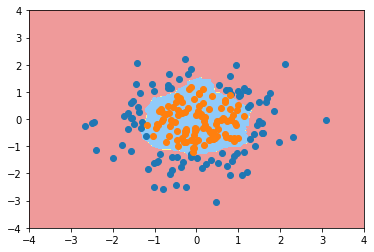

In [10]:
plot_deciBiOn_boundary(knn,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

#### 使用逻辑回归 

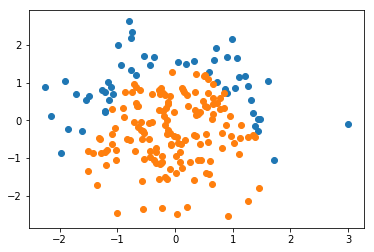

In [13]:
X = np.random.normal(0,1,size=(200,2)) # 代表均值和标准差
y = np.array(X[:,0]**2 + X[:,1]  < 1.5,dtype="int")
# 样本添加噪音
for _ in range(20):
    y[np.random.randint(200)] == 1
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test = train_test_split(X,y)
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


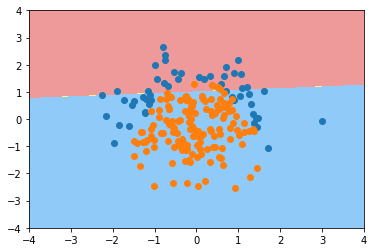

In [15]:
plot_deciBiOn_boundary(log_reg,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

##### 使用多项式

In [16]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
def PloylogisticRegression(degree):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("stand",StandardScaler()),
        ("method",LogisticRegression())
    ])

log_regression = PloylogisticRegression(degree=2)
log_regression.fit(X_train,y_train)

/usr/software/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('stand', StandardScaler(copy=True, with_mean=True, with_std=True)), ('method', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))])

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/usr/software/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


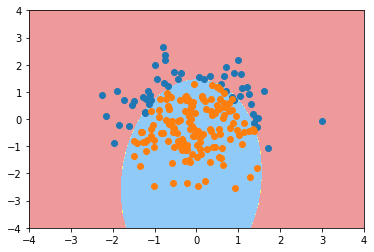

In [17]:
plot_deciBiOn_boundary(log_regression,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.pipeline import Pipeline
def PloylogisticRegression(degree,C,penalty):
    return Pipeline([
        ("poly",PolynomialFeatures(degree=degree)),
        ("stand",StandardScaler()),
        ("method",LogisticRegression(C=C,penalty=penalty))
    ])

log_regression2 = PloylogisticRegression(degree=5,C=0.1,penalty="l1")
log_regression2.fit(X_train,y_train)

In [ ]:
plot_deciBiOn_boundary(log_regression2,[-4,4,-4,4])
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()